## Importing All required Libraries

In [1]:
# We will ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# We will import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics



pd.set_option('display.max_columns',230)

### Reading and Understanding the Data
 1. Importing data using the pandas library
 2. Understanding the structure of the data

In [2]:
#Reading data 
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df.shape

(99999, 226)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# Checking unique customer
print ("Unique customers  in the data: %d"%len(df.mobile_number.unique()))

Unique customers  in the data: 99999


## Data cleaning

In [7]:
# function to identify missing value
def MissingColumns(missingCutoff):
    missing = round(100*(df.isnull().sum()/df.shape[0]))
    return missing.loc[missing > missingCutoff]

In [8]:
def imputeMissingValue(data,imputeColList=False,missingColList=False):
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [9]:
MissingColumns(50)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

Inference:
There are few columns which are required for analysis. We can impute these values with 0 for the analysis.

In [10]:
imputeColumn = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
imputeMissingValue(df,imputeColumn)

In [11]:
MissingColumns(50)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

### Dropping  columns with more than 50% missing values

In [12]:
missingcolumn = list(MissingColumns(50).index)
df.drop(missingcolumn,axis=1,inplace=True)
df.shape

(99999, 222)

In [13]:
# identify columns with more than 5% missing values
MissingColumns(5)

onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

In [14]:
missingcol = list(MissingColumns(5).index)
df[df[missingcol].isnull().all(axis=1)][missingcol].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We will impute these values with 0.

In [15]:
imputeMissingValue(df,missingColList=missingcol)

In [16]:
df=df[~df[missingcol].isnull().all(axis=1)]
df.shape

(99999, 222)

In [17]:
# identify columns with more than 2% missing values
MissingColumns(2)

onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
                      ... 
ic_others_6            4.0
ic_others_7            4.0
ic_others_8            5.0
date_of_last_rech_8    4.0
date_of_last_rech_9    5.0
Length: 89, dtype: float64

In [18]:
missingcol= list(MissingColumns(2).index)
df[df[missingcol].isnull().all(axis=1)][missingcol].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We will now drop these customers from the data , as for these customers no data is available for 3 months

In [19]:
df=df[~df[missingcol].isnull().all(axis=1)]
df.shape

(99618, 222)

In [20]:
# As a next setep - for other customers, where these missing values are spread-out, we will now impute the same with zero. 
missingcol.remove('date_of_last_rech_8')
missingcol.remove('date_of_last_rech_9')
imputeMissingValue(df,missingColList=missingcol)

In [21]:
# Checking remaining columns for null values
MissingColumns(0)

loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [22]:
cols = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in cols: 
    print("The unique values in column %s are %s" % (c,df[c].unique()))

The unique values in column loc_og_t2o_mou are [ 0. nan]
The unique values in column std_og_t2o_mou are [ 0. nan]
The unique values in column loc_ic_t2o_mou are [ 0. nan]
The unique values in column last_date_of_month_7 are ['7/31/2014' nan]
The unique values in column last_date_of_month_8 are ['8/31/2014' nan]
The unique values in column last_date_of_month_9 are ['9/30/2014' nan]
The unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
The unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/

In [23]:
# Please note - some of these features take only one value. 
# We will now impute their missing values in these features with the mode value

cols = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in cols:
    print(df[c].value_counts())
    df[c].fillna(df[c].mode()[0], inplace=True)
print("All above features take only one value. We will now impute the missing values in these features with the mode value")


0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64
All above features take only one value. We will now impute the missing values in these features with the mode value


In [24]:
MissingColumns(0)

date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [25]:
# Features which are missing together
missingcol = list(MissingColumns(0).index)
print ("There are %d rows having missing values for these variables."%(len(df[df[missingcol].isnull().all(axis=1)])))

There are 22 rows having missing values for these variables.


In [26]:
df[df['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
df[df['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
df[df['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
df[df['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

As a next step - we will now look for columns having all values as 0.

In [27]:
col_zero=df.columns[(df == 0).all()]
print ("There are {} features which have only 0 as value. These features are \n{}".format(len(col_zero),col_zero))

There are 11 features which have only 0 as value. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [28]:
# We are removing the column with single value 0.
df.drop(col_zero,axis=1,inplace=True)

In [29]:
# Data left after removing the missing values.
print ("Customers: {}".format(df.shape[0]))
print ("Features: {}".format(df.shape[1]))

Customers: 99618
Features: 211


### checking data types and columns names

In [30]:
df.reset_index(inplace=True,drop=True)
# Identifying list of all columns which store date
date_columns = list(df.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [31]:
# We will now convert dtype of date columns to datetime
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 160.4 MB


we can notice that  there are some monthly features which are not in standard naming convention (\_6,\_7,\_8,\_9)

In [33]:
# we have to rename column as per standard:
#'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'

df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

### Creating Derived Columns

In [34]:
for c in range(6,10):
    df['vol_data_mb_'+str(c)] = (df['vol_2g_mb_'+str(c)]+df['vol_3g_mb_'+str(c)]).astype(int)

### Filtering High Value Customers
Customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months, i.e. the good phase.

In [35]:
rechargecol = df.filter(regex=('count')).columns
df[rechargecol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We are  creating new feature like  avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

Those new features  will stores avgerage recharge amount for respectve months

In [36]:
# Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
for i in range(6,10):
    df['avg_rech_amt_'+str(i)] = round(df['total_rech_amt_'+str(i)]/df['total_rech_num_'+str(i)]+1,2)

In [37]:
imputeMissingValue(df,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

In [38]:
# Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
#These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each of the months
for i in range(6,10):
    df['total_rech_num_data_'+str(i)] = (df['count_rech_2g_'+str(i)]+df['count_rech_3g_'+str(i)]).astype(int)

In [39]:
# We will now create new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
for i in range(6,10):
    df['total_rech_amt_data_'+str(i)] = df['total_rech_num_data_'+str(i)]*df['av_rech_amt_data_'+str(i)]

In [40]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    df['total_month_rech_'+str(i)] = df['total_rech_amt_'+str(i)]+df['total_rech_amt_data_'+str(i)]
df.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [41]:
# Calculating the avegare of first two months i . e good phase
good_avg =(df.total_month_rech_6 + df.total_month_rech_7)/2
# finding 70% cutoff as mention in problem statement
hv_cutoff= np.percentile(good_avg,70)

high_value_users = df[good_avg >=  hv_cutoff]
high_value_users.reset_index(inplace=True,drop=True)

print("High Value Customers are: %d\n"% len(high_value_users))
print("Percentage value of High Value Customers: {}%".format(round(len(high_value_users)/df.shape[0]*100),2))

High Value Customers are: 29906

Percentage value of High Value Customers: 30%


### Churned customers
We will now tag the churned customers (churn=1, else 0) based on the fourth month as per the following definition: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [42]:
def ChurnedCustomers(data,churnPhaseMonth=9):
    churning_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag = ~data[[s + str(churnPhaseMonth) for s in churning_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [43]:
high_value_users['churn'] = ChurnedCustomers(high_value_users,9)
print("{} users tagged as churners out of the {} High-Value Customers.".format(len(high_value_users[high_value_users.churn == 1]),high_value_users.shape[0]))
print("The High-value Churn Percentage is: {}%".format(round(len(high_value_users[high_value_users.churn == 1])/high_value_users.shape[0] *100,2)))

2418 users tagged as churners out of the 29906 High-Value Customers.
The High-value Churn Percentage is: 8.09%


##  Data Analysis and EDA

In [44]:
# Function to plot the histogram with labels
def plot_histogram(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightgreen', edgecolor='gray')
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    plt.show()

In [45]:
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    if pltType == 'multi':
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()

In [46]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=high_value_users.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [47]:
def plot_byChurn(data,col):
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(high_value_users.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    return high_value_users.groupby('churn')[colList].mean()

In [48]:
# Filtering the common monthly columns for each month
common_col = high_value_users.filter(regex ='_6').columns
monthly_col = [item.strip('_6') for item in common_col]
monthly_col

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [49]:
print ("The total number of columns in data are:", high_value_users.shape[1])
print ("The number of columns for each month are: ",len(monthly_col))
print ("The total monthly columns among the orignal columns (%d*4) are: %d"%(len(monthly_col), len(monthly_col) * 4))
print ("The columns other than monthly columns are:", high_value_users.shape[1] - (len(monthly_col) * 4))

The total number of columns in data are: 232
The number of columns for each month are:  57
The total monthly columns among the orignal columns (57*4) are: 228
The columns other than monthly columns are: 4


In [50]:
# Removing all the attributes corresponding to the 9th month 
col_list_9 = high_value_users.filter(regex=('_9')).columns
high_value_users.drop(col_list_9,axis=1,inplace=True)

In [51]:
# Obtaining the list of all the monthly columns 6,7,8,9
allmonthlcol = [x + s for s in ['_6','_7','_8'] for x in monthly_col]
allmonthlcol

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'vol_data_mb_6',
 'avg_rech_

In [52]:
nonmonthlycol = [col for col in high_value_users.columns if col not in allmonthlcol]
nonmonthlycol

['mobile_number', 'circle_id', 'aon', 'churn']

In [53]:
# We will now get the distinct circle_id's in the data
high_value_users.circle_id.value_counts()

109    29906
Name: circle_id, dtype: int64

Removing columns circle_id as it is providing no value to model and it is unique

In [54]:
high_value_users.drop('circle_id',axis=1,inplace=True)

#### Incoming/Outgoing MOU v/s Churn 

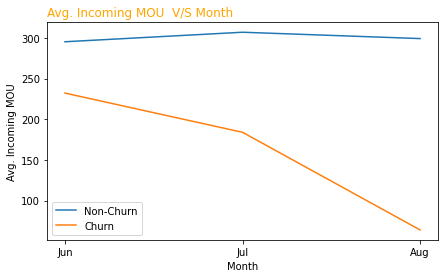

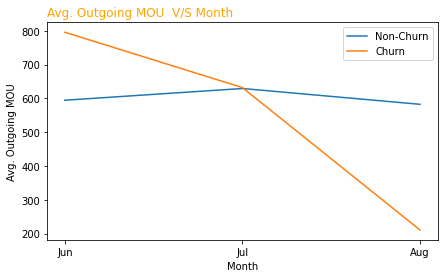

In [55]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

From the above mentioned plot, we can note that:
1. Churners Avg. Incoming/Outgoing MOUs drops drastically after the 2nd month,Jul.
2. While the non-churners Avg. MOUs remains consistant and stable with each month.
3. Clearly, users MOU is a key feature to predict churn.

In [56]:
# The average Incoming MOU per month churn vs Non-Churn
high_value_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.401726,307.108317,299.319664
1,232.221162,183.978888,63.813168


In [57]:
# The average Outgoing MOU per month churn vs Non-Churn
high_value_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,594.414582,629.096568,582.380539
1,795.591038,631.859433,210.659326


We will now create new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
These features will hold the ratio (=total_og_mou_* / total_ic_mou_*) for each month. These features will combine both incoming and outgoing informations and shall give a better predictor of churn.

In [58]:
# We will now create new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# Also be adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    high_value_users['og_to_ic_mou_'+str(i)] = (high_value_users['total_og_mou_'+str(i)])/(high_value_users['total_ic_mou_'+str(i)]+1)

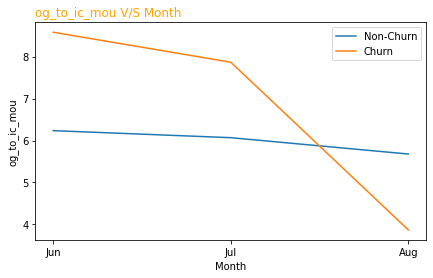

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.235602,6.067952,5.678424
1,8.580257,7.865938,3.870145


In [59]:
plot_byChurn(high_value_users,'og_to_ic_mou')

From above graph we can infer that:
1. Outgoing to incoming mou remains drops significantly for churners from month Jul(6) to Aug(7).
2. While it remains almost consistent for the non-churners.

In [60]:
# We will now create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
for i in range(6,9):
    high_value_users['loc_og_to_ic_mou_'+str(i)] = (high_value_users['loc_og_mou_'+str(i)])/(high_value_users['loc_ic_mou_'+str(i)]+1)

# We have added 1 to denominator to avoid dividing by 0

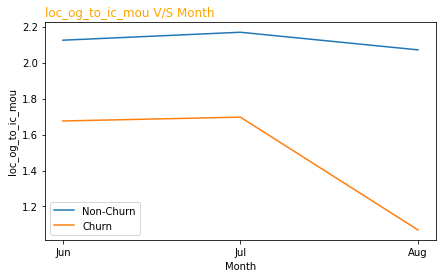

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.124471,2.168763,2.070806
1,1.675413,1.696809,1.069765


In [61]:
plot_byChurn(high_value_users,'loc_og_to_ic_mou')

#### Total data volume v/s Churn 

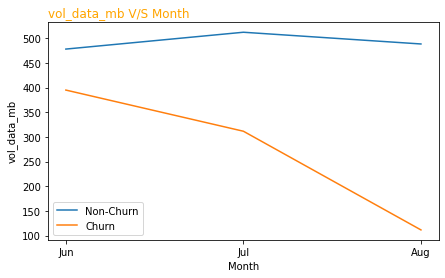

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,478.037762,512.164072,488.389661
1,394.949545,311.507444,111.469396


In [62]:
plot_byChurn(high_value_users,'vol_data_mb')

From the above graph, the volume of data used drops significantly for churners from month Jul(6) to Aug(7).

#### Total monthly rech v/s Churn 

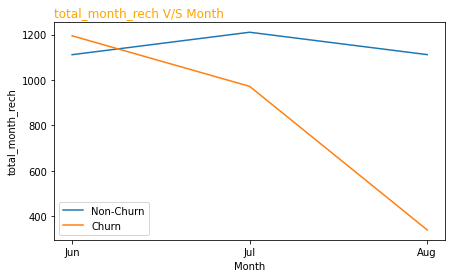

,total_month_rech_6,total_month_rech_7,total_month_rech_8
churn,,,
0,1111.439977,1210.362853,1111.756912
1,1194.747593,971.802758,339.278974


In [63]:
plot_byChurn(high_value_users,'total_month_rech')

Above graph indicates that the total monthly rech amount also drops significantly for churners from month Jul(6) to Aug(7).

Creating new feature: Total_loc_mou_6, Total_loc_mou_7, Total_loc_mou_8. 
These features will hold the Total MOU (=loc_og_mou+loc_ic_mou) for each month.
Using this we will find if the loc MOU (both incoming and outgoing) drops or increaces as the months goes by.
This information shall be a better predictor of churn.

In [64]:
# We will be creating new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    high_value_users['Total_loc_mou_'+str(i)] = (high_value_users['loc_og_mou_'+str(i)])+(high_value_users['loc_ic_mou_'+str(i)])

Now create new features
Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8. 

These features will hold the Total roaming MOU (=roam_ic_mou+roam_og_mou) for each month.
Using this we will find if the roam MOU (both incoming and outgoing) drops or increaces as the months goes by.
This information shall be a better predictor of churn.

In [65]:
# We will create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    high_value_users['Total_roam_mou_'+str(i)] = (high_value_users['roam_ic_mou_'+str(i)])+(high_value_users['roam_og_mou_'+str(i)])

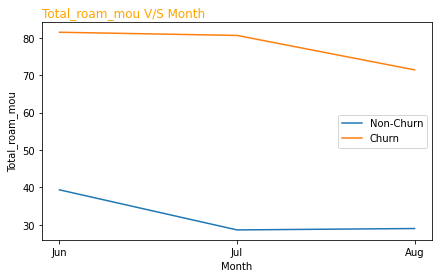

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [66]:
plot_byChurn(high_value_users,'Total_roam_mou')

From the above graph, the roaming usage of churners is way higher than those of non-churners across all months. Also, users who are making/receiving more roaming calls during their tenure are more likely to churn.

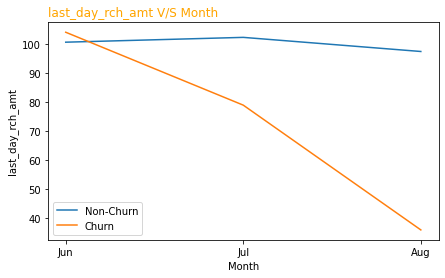

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.657232,102.318284,97.451724
1,104.085194,78.956989,35.955749


In [67]:
plot_byChurn(high_value_users,'last_day_rch_amt')

## Build a Model

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [69]:
def getModelMetrics(actual_churn=False,pred_churn=False):
    confusion = metrics.confusion_matrix(actual_churn, pred_churn)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    print('Specificity: {}'.format(TN / float(TN+FP)))
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))    

In [70]:
def predictChurnWithProb(model,X,y,prob):
    pred_probs = model.predict_proba(X)[:,1]    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [71]:
def OptimalCutoff(df):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)

    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [72]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    alg.fit(X_train, y_train)        
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]

    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [73]:
hv_users_PCA = high_value_users.copy()
# removing the columns not required for modeling
hv_users_PCA.drop(['mobile_number'], axis=1, inplace=True)

In [74]:
# Removing the date  columns before PCA
dateTimeCols = list(hv_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
hv_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [75]:
# X variables
X = hv_users_PCA.drop(['churn'], axis=1)

In [76]:
# Y variables
y = hv_users_PCA['churn']  

In [77]:
# Spiltting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [78]:
# Scaling features using MinMaxScaler
scaler = MinMaxScaler()

In [79]:
# Fit and transform the scaler on train
X_train = scaler.fit_transform(X_train)

# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

## Handling class imbalance

In [80]:
print("Before OverSampling, the count of label '1' is: {}".format(sum(y_train==1)))
print("Before OverSampling, the count of label '0' is: {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate is: {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, the count of label '1' is: 1700
Before OverSampling, the count of label '0' is: 19234 

Before OverSampling, churn event rate is: 8.12% 



In [81]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [82]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38468, 178)
After OverSampling, the shape of train_y: (38468,) 

After OverSampling, counts of label '1': 19234
After OverSampling, counts of label '0': 19234
After OverSampling, churn event rate : 50.0% 



In [83]:
#Improting the PCA module
pca = PCA(svd_solver='randomized', random_state=100)

In [84]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=100, svd_solver='randomized')

In [85]:
pca.explained_variance_ratio_[:50]

array([0.52943253, 0.11613028, 0.08292588, 0.04669254, 0.02590296,
       0.02220639, 0.01966955, 0.0163294 , 0.01308142, 0.01177103,
       0.0090579 , 0.00844082, 0.00767876, 0.00592963, 0.00540776,
       0.00491405, 0.00396856, 0.00365744, 0.00351876, 0.00336531,
       0.00316534, 0.00311945, 0.00297922, 0.00264813, 0.00264101,
       0.00240347, 0.00234155, 0.00214153, 0.00210646, 0.00204967,
       0.00189871, 0.00177618, 0.00158665, 0.00136121, 0.00132115,
       0.0013041 , 0.00119334, 0.00114706, 0.001046  , 0.00091965,
       0.00082467, 0.00077877, 0.00075135, 0.0007494 , 0.0007283 ,
       0.00072105, 0.00065781, 0.00065022, 0.0006321 , 0.00061168])

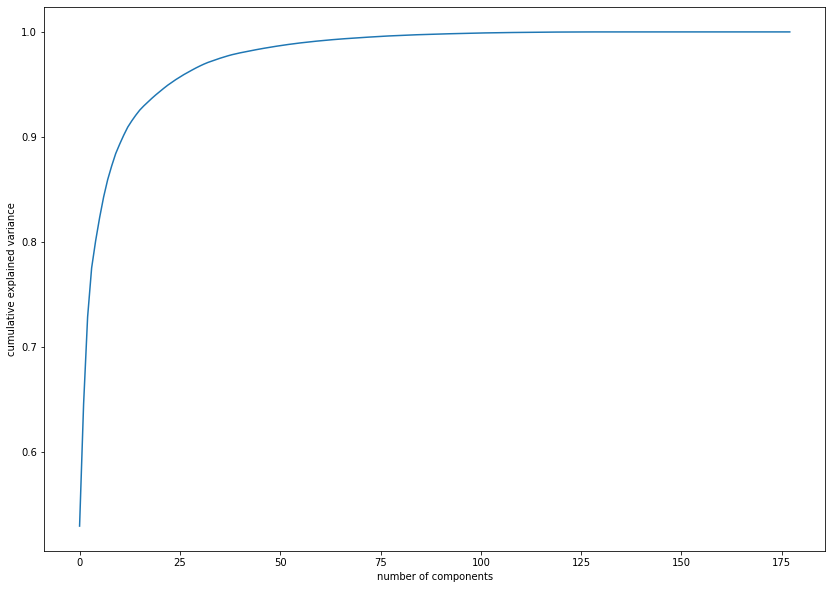

In [86]:
#Plotting scree plot 
%matplotlib inline
fig = plt.figure(figsize = (14,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### We can see that 40 components are enough to describe 95% of the variance in the dataset. Selecting 40 components for our modeling

In [87]:
#Using incremental PCA for efficiency
pca_final = IncrementalPCA(n_components=40)

In [88]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 40)

In [89]:
#Applying selected 40 components to the test data
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 40)

For the prediction of churn customers, we'll fit variety of models and select the one which shall be the best predictor of churn. Models trained are,
    1. Logistic Regression
    2. Lasso regression
    3. Random Forest

### 1 Logistic regression

In [90]:
#Training the model on the train data
lr0 = LogisticRegression(class_weight='balanced')

In [91]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.835
Recall/Sensitivity : 0.8514
AUC Score (Train): 0.906830
CV Score : Mean - 0.9060837 | Std - 0.003480927 | Min - 0.8999549 | Max - 0.910343


In [92]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8150947999889308
Sensitivity/Recall : 0.8050139275766016
Specificity: 0.82517567240126
False Positive Rate: 0.17482432759874
Positive predictive value: 0.28599703117268677
Negative Predictive value: 0.9798590130916415
sklearn precision score value: 0.28599703117268677


In [93]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8235621934908605
Recall : 0.8050139275766016
Precision : 0.28599703117268677


In [94]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.91


In [95]:
cut_off_prob=0.4
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8222938546324218
Sensitivity/Recall : 0.8932619319954248
Specificity: 0.7513257772694187
False Positive Rate: 0.24867422273058126
Positive predictive value: 0.7822345656528865
Negative Predictive value: 0.8756059137178865
sklearn precision score value: 0.7822345656528865


,churn,churn_Prob,final_predicted
0,0,0.780120,1
1,0,0.009024,0
2,0,0.103529,0
3,0,0.025849,0
4,0,0.825640,1


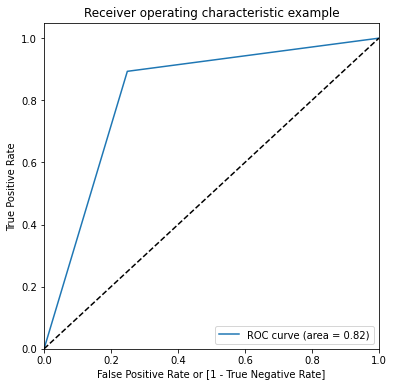

(array([0.        , 0.24867422, 1.        ]),
 array([0.        , 0.89326193, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [96]:
# Ploting ROC curve
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [97]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.82


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.685869  0.980139  0.391598
0.2   0.2  0.754029  0.955859  0.552199
0.3   0.3  0.795934  0.927524  0.664344
0.4   0.4  0.822294  0.893262  0.751326
0.5   0.5  0.834980  0.851409  0.818550
0.6   0.6  0.835084  0.791983  0.878184
0.7   0.7  0.821072  0.724134  0.918010
0.8   0.8  0.784366  0.619008  0.949724
0.9   0.9  0.608012  0.231725  0.984299


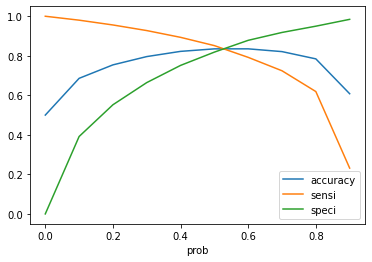

In [98]:
# Finding optimal cutoff point
OptimalCutoff(y_train_df)

In [99]:
# From above cutoff optimal point is 0.5
cut_off_prob = 0.5
predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob).head()

Roc_auc_score : 0.8349797234064678
Sensitivity/Recall : 0.8514089632941666
Specificity: 0.8185504835187688
False Positive Rate: 0.18144951648123114
Positive predictive value: 0.8243229638578475
Negative Predictive value: 0.8463606063864101
sklearn precision score value: 0.8243229638578475


,churn,churn_Prob,final_predicted
0,0,0.780120,1
1,0,0.009024,0
2,0,0.103529,0
3,0,0.025849,0
4,0,0.825640,1


In [100]:
# Prediction on test data
# predicting with Cut-off
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off_prob).head()

Roc_auc_score : 0.8150947999889308
Sensitivity/Recall : 0.8050139275766016
Specificity: 0.82517567240126
False Positive Rate: 0.17482432759874
Positive predictive value: 0.28599703117268677
Negative Predictive value: 0.9798590130916415
sklearn precision score value: 0.28599703117268677


,churn,churn_Prob,final_predicted
4265,0,0.467180,0
29221,0,0.569447,1
974,0,0.400041,0
1602,0,0.319778,0
10225,0,0.132896,0


### 2. Random Forest

In [101]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

In [102]:
# Tuning Max_depth
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters,  cv=5,  scoring="f1",return_train_score=True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

In [103]:
scores = rfgs.cv_results_
print(scores)

{'mean_fit_time': array([ 8.41016135, 10.59894538, 11.7065485 , 12.38799372]), 'std_fit_time': array([0.04781725, 0.07111763, 0.06730627, 0.22178153]), 'mean_score_time': array([0.07436452, 0.09727278, 0.10604162, 0.10822616]), 'std_score_time': array([0.00612649, 0.00628643, 0.004638  , 0.00321626]), 'param_max_depth': masked_array(data=[10, 15, 20, 25],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 10}, {'max_depth': 15}, {'max_depth': 20}, {'max_depth': 25}], 'split0_test_score': array([0.8880597 , 0.94230526, 0.95063291, 0.95368608]), 'split1_test_score': array([0.89464904, 0.93583566, 0.94696681, 0.94732824]), 'split2_test_score': array([0.88814691, 0.93592184, 0.94429573, 0.94864589]), 'split3_test_score': array([0.89348049, 0.93727781, 0.94645809, 0.950447  ]), 'split4_test_score': array([0.89417513, 0.94280279, 0.95031847, 0.95255102]), 'mean_test_score': array([0.89170226, 0.93882867, 0.9477344 , 0.95

In [104]:
max_depth = scores["param_max_depth"].tolist()
train_mean_score = scores["mean_train_score"].tolist()
test_mean_score = scores["mean_test_score"].tolist()

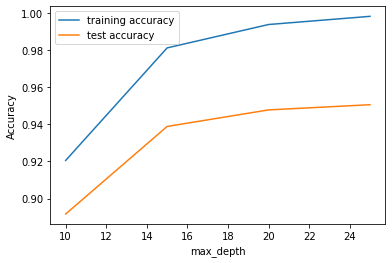

In [105]:
# plotting accuracies after tuning Random forest  max_depth
plt.figure()
plt.plot(max_depth, train_mean_score,label="training accuracy")
plt.plot(max_depth, test_mean_score, label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [106]:
#Tuning n-estimator
parameters = {'n_estimators': range(40, 140, 35)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters,  cv=3,  scoring="recall",return_train_score=True)

In [107]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(40, 140, 35)},
             return_train_score=True, scoring='recall')

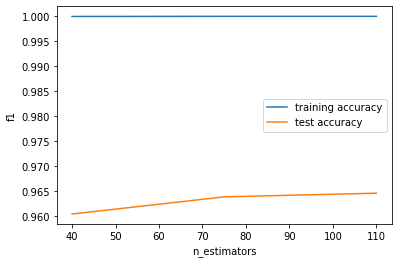

In [108]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

In [109]:
# tuning max features
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters,  cv=5, scoring="f1")

In [110]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=80,
                                              random_state=10),
             param_grid={'max_features': [4, 8, 14, 20, 24]}, scoring='f1')

In [111]:
#Tuning min sample leaf
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters, cv=3, scoring="f1")

In [112]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              n_estimators=80,
                                              random_state=10),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             scoring='f1')

In [113]:
# Tuning min sample split
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, cv=3, scoring="f1")

In [114]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              min_samples_leaf=100,
                                              n_estimators=80,
                                              random_state=10),
             param_grid={'min_samples_split': range(50, 300, 50)},
             scoring='f1')

In [115]:
random_forest_final = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,min_samples_split=150,random_state=10)

In [116]:
print("Model performance on Train data:")
modelfit(random_forest_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.863
Recall/Sensitivity : 0.8591
AUC Score (Train): 0.938419
CV Score : Mean - 0.9215811 | Std - 0.00435162 | Min - 0.9131337 | Max - 0.9249009


In [117]:
# predict on test data
predictions = random_forest_final.predict(X_test_pca)

In [118]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.8018396415209844
Sensitivity/Recall : 0.7437325905292479
Specificity: 0.8599466925127212
False Positive Rate: 0.1400533074872789
Positive predictive value: 0.31597633136094677
Negative Predictive value: 0.9747322164240593
sklearn precision score value: 0.31597633136094677


In [119]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(random_forest_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8630290111261308
Sensitivity/Recall : 0.8590516793178746
Specificity: 0.867006342934387
False Positive Rate: 0.13299365706561297
Positive predictive value: 0.8659399402547037
Negative Predictive value: 0.8601640274410688
sklearn precision score value: 0.8659399402547037


,churn,churn_Prob,final_predicted
0,0,0.548752,1
1,0,0.058062,0
2,0,0.229829,0
3,0,0.298188,0
4,0,0.799478,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.575231  1.000000  0.150463
0.2   0.2  0.718987  0.992773  0.445201
0.3   0.3  0.809504  0.966310  0.652698
0.4   0.4  0.852735  0.919310  0.786160
0.5   0.5  0.863029  0.859052  0.867006
0.6   0.6  0.847848  0.773682  0.922013
0.7   0.7  0.808282  0.655142  0.961422
0.8   0.8  0.712696  0.440002  0.985390
0.9   0.9  0.583602  0.168816  0.998388


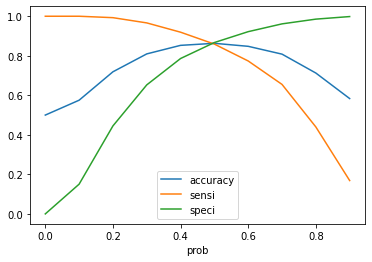

In [120]:
# finding cut-off with the right balance of the metrices
OptimalCutoff(y_train_df)

In [121]:
cut_off_prob=0.5
predictChurnWithProb(random_forest_final,X_train_pca,y_train_res,cut_off_prob).head()

Roc_auc_score : 0.8630290111261308
Sensitivity/Recall : 0.8590516793178746
Specificity: 0.867006342934387
False Positive Rate: 0.13299365706561297
Positive predictive value: 0.8659399402547037
Negative Predictive value: 0.8601640274410688
sklearn precision score value: 0.8659399402547037


,churn,churn_Prob,final_predicted
0,0,0.548752,1
1,0,0.058062,0
2,0,0.229829,0
3,0,0.298188,0
4,0,0.799478,1


In [122]:
cut_off_prob=0.5
predictChurnWithProb(random_forest_final,X_train_pca,y_train_res,cut_off_prob).head()

Roc_auc_score : 0.8630290111261308
Sensitivity/Recall : 0.8590516793178746
Specificity: 0.867006342934387
False Positive Rate: 0.13299365706561297
Positive predictive value: 0.8659399402547037
Negative Predictive value: 0.8601640274410688
sklearn precision score value: 0.8659399402547037


,churn,churn_Prob,final_predicted
0,0,0.548752,1
1,0,0.058062,0
2,0,0.229829,0
3,0,0.298188,0
4,0,0.799478,1


In [123]:
# Making prediction on test set
y_test_df= predictChurnWithProb(random_forest_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8018396415209844
Sensitivity/Recall : 0.7437325905292479
Specificity: 0.8599466925127212
False Positive Rate: 0.1400533074872789
Positive predictive value: 0.31597633136094677
Negative Predictive value: 0.9747322164240593
sklearn precision score value: 0.31597633136094677


,churn,churn_Prob,final_predicted
4265,0,0.396418,0
29221,0,0.414049,0
974,0,0.494311,0
1602,0,0.329000,0
10225,0,0.201254,0


## 3. Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
dt0 = DecisionTreeClassifier(class_weight='balanced',max_features='auto',min_samples_split=100,min_samples_leaf=100,max_depth=6,random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7915
Recall/Sensitivity : 0.7665
AUC Score (Train): 0.855182
CV Score : Mean - 0.8542999 | Std - 0.006008795 | Min - 0.8489981 | Max - 0.8651112


In [125]:
# Making predictions and displaying the model metrices
pred_probs_test = dt0.predict(X_test_pca)
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7313160564338519
Sensitivity/Recall : 0.6448467966573816
Specificity: 0.8177853162103222
False Positive Rate: 0.18221468378967773
Positive predictive value: 0.23538383324860193
Negative Predictive value: 0.9635974304068522
sklearn precision score value: 0.23538383324860193


In [126]:
# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': range(5,15,3),'min_samples_leaf': range(100, 400, 50),'min_samples_split': range(100, 400, 100),'max_features': [8,10,15]}

In [127]:
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)

In [128]:
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [129]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [130]:
# Optimal accuracy score
print(grid_search.best_score_)

0.8114166708110067


In [131]:
# to see hyperparameter
print(grid_search.best_params_)

{'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [132]:
# Model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',max_depth=11, min_samples_leaf=100, min_samples_split=100, max_features=15,random_state=10)

In [133]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8372
Recall/Sensitivity : 0.8452
AUC Score (Train): 0.917467
CV Score : Mean - 0.8931607 | Std - 0.006250494 | Min - 0.8810706 | Max - 0.899031


In [134]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)

In [135]:
#Model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7603522019879954
Sensitivity/Recall : 0.7019498607242339
Specificity: 0.8187545432517567
False Positive Rate: 0.18124545674824327
Positive predictive value: 0.252
Negative Predictive value: 0.9693057946069994
sklearn precision score value: 0.252


In [136]:
# to print  classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8254
           1       0.25      0.70      0.37       718

    accuracy                           0.81      8972
   macro avg       0.61      0.76      0.63      8972
weighted avg       0.91      0.81      0.85      8972



In [137]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8372153478215659
Sensitivity/Recall : 0.8452220027035457
Specificity: 0.8292086929395861
False Positive Rate: 0.17079130706041384
Positive predictive value: 0.8319005219527172
Negative Predictive value: 0.8427031596745218
sklearn precision score value: 0.8319005219527172


,churn,churn_Prob,final_predicted
0,0,0.115108,0
1,0,0.012987,0
2,0,0.053691,0
3,0,0.052910,0
4,0,0.922292,1


     prob  accuracy     sensi     speci
0.0   0.0  0.585448  1.000000  0.170895
0.1   0.1  0.722367  0.989030  0.455703
0.2   0.2  0.792529  0.956743  0.628314
0.3   0.3  0.819148  0.930384  0.707913
0.4   0.4  0.829937  0.899293  0.760580
0.5   0.5  0.837215  0.845222  0.829209
0.6   0.6  0.830093  0.777061  0.883124
0.7   0.7  0.816887  0.722055  0.911719
0.8   0.8  0.787356  0.631642  0.943070
0.9   0.9  0.708849  0.443434  0.974264


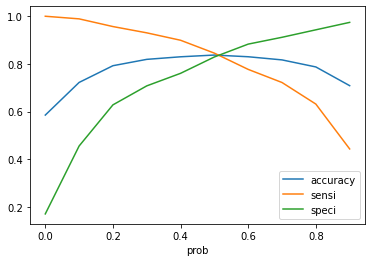

In [138]:
# finding cut-off with the right balance of the metrices
OptimalCutoff(y_train_df)

In [139]:
# predicting churn with cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8372153478215659
Sensitivity/Recall : 0.8452220027035457
Specificity: 0.8292086929395861
False Positive Rate: 0.17079130706041384
Positive predictive value: 0.8319005219527172
Negative Predictive value: 0.8427031596745218
sklearn precision score value: 0.8319005219527172


,churn,churn_Prob,final_predicted
0,0,0.115108,0
1,0,0.012987,0
2,0,0.053691,0
3,0,0.052910,0
4,0,0.922292,1


In [140]:
# Performing on Test Data
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7603522019879954
Sensitivity/Recall : 0.7019498607242339
Specificity: 0.8187545432517567
False Positive Rate: 0.18124545674824327
Positive predictive value: 0.252
Negative Predictive value: 0.9693057946069994
sklearn precision score value: 0.252


,churn,churn_Prob,final_predicted
4265,0,0.176471,0
29221,0,0.140000,0
974,0,0.178344,0
1602,0,0.208633,0
10225,0,0.276119,0


- Decision tree after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 84.52%**  and  **Train Roc_auc_score : 83.72**
<br>**Test Recall : 70.19%**  and  **Test Roc_auc_score : 76.03**

## Final Model Choice 

Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives. 

Overall, the **Logistic Regression** model with probability cut-off = 0.5, performs best. It achieved the **best recall accuracy of 80.05%** for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it. 

From the Tree Family, the Decision Tree overfitted the data slightly while obtaining 70.19% recall accuracy on test data. 
The Random Forest avoided overfitting but obtained only 74.37% recall accuracy on test data. 

## Identifying relevant churn features. 

In [141]:
# Create the parameter grid based on the results of random search 
param_grid = {'max_depth': [8,10,12],'min_samples_leaf': range(100, 400, 200),'min_samples_split': range(200, 500, 200), 'n_estimators': [100,200, 300], 'max_features': [12, 15, 20]}

In [142]:
# Create a based model
rf = RandomForestClassifier()

In [143]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 4,verbose = 1)

In [144]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [145]:
# checking Optimal accuracy score
print(grid_search.best_score_)

0.8921962352530874


In [146]:
# Hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [147]:
rf = RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100, min_samples_split=200, n_estimators=300, random_state=10)

In [148]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=10)

<Axes: >

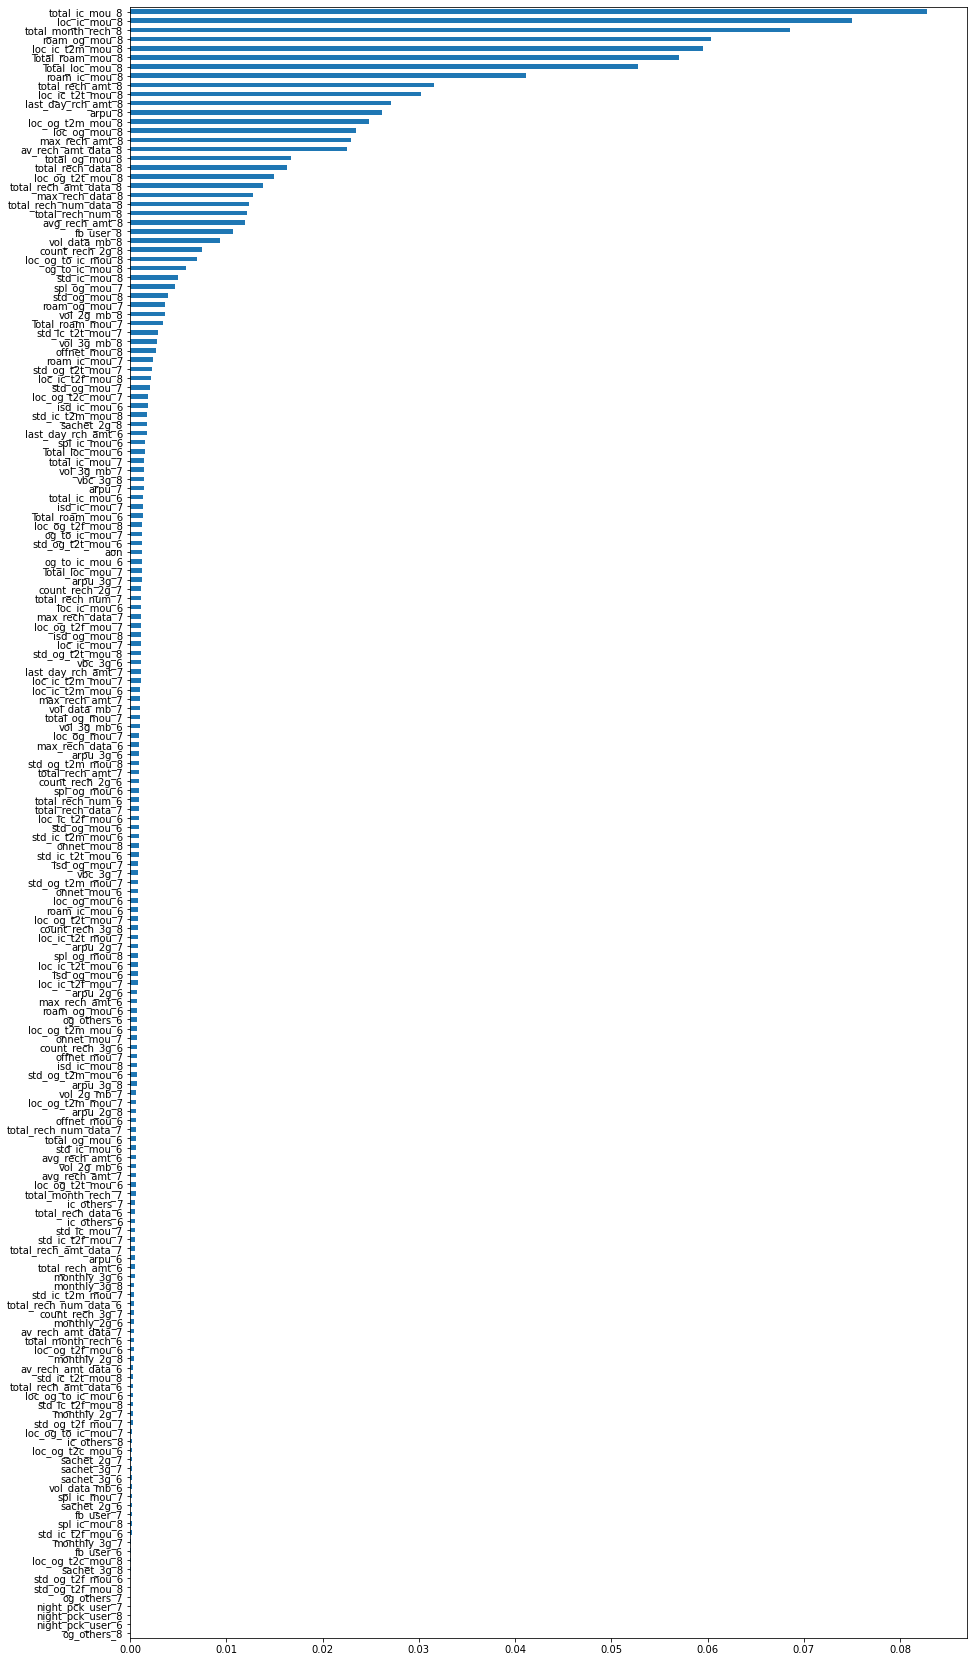

In [149]:
plt.figure(figsize=(15,30))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

The graph above suggest that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. From this, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. 

Specifically, these features are as follows:




1.	**total_ic_mou_8**		-- *Total incoming minutes of usage in month 8*
2.	**loc_ic_mou_8**		-- *local incoming minutes of usage in month 8*
3.	**total_month_rech_8**	-- *Total month recharge amount in month 8*	
4.	**total_roam_mou_8**	-- *Total incoming+outgoing roaming minutes of usage in month 8*
5.	**loc_ic_t2m_mou_8**	-- *local incoming calls to another operator minutes of usage in month 8*
6.	**roam_og_mou_8**		-- *outgoing roaming calls minutes of usage in month 8*
7.	**Total_loc_mou_8**		-- *Total local minutes of usage in month 8*
8.	**roam_ic_mou_8**		-- *incoming roaming calls minutes of usage in month 8*
9.	**total_rech_amt_8**	-- *total recharge amount in month 8*
10.	**loc_ic_t2t_mou_8**	-- *local incoming calls from same operator minutes of usage in month 8*
11.	**max_rech_amt_8**		-- *maximum recharge amount in month 8*
12.	**last_day_rch_amt_8**	-- *last (most recent) recharge amount in month 8*
13.	**arpu_8**				-- *average revenue per user in month 8*
14.	**loc_og_mou_8**		-- *local outgoing calls minutes of usage in month 8*
15.	**loc_og_t2n_mou_8**	-- *local outgoing calls minutes of usage to other operator mobile in month 8*
16.	**av_rech_amt_data_8**	-- *average recharge amount for mobile data in month 8*
17.	**total_rech_data_8**	-- *total data recharge (MB) in month 8*
18.	**total_og_t2t_mou_8**	-- *total outgoing calls from same operator minutes of usage in month 8*
19.	**total_rech_num_8**	-- *total number of recharges done in the month 8*
20.	**total_rech_amt_data_8**	-- *total recharge amount for data in month 8*
21.	**max_rech_data_8**		-- *maximum data recharge (MB) in month 8*
22.	**avg_rech_amt_8**		-- *average recharge amount in month 8*
23.	**fb_user_8**			-- *services of Facebook and similar social networking sites for month 8*
24.	**vol_data_mb_8**		-- *volume of data (MB) consumed for month 8*
25.	**count_rech_2g_8**		-- *Number of 2g data recharge in month 8*
26.	**loc_og_to_ic_mou_8**	-- *local outgoing to incoming mou ratio for month of 8*
27.	**spl_og_mou_7**		-- *Special outgoing call for the month of 7*

## Conclusion

On careful observation, we initially found that the Churner's outgoing usage was more than that of Non-Churners, but Gradually they dropped there outgoing usage. 
Naturally they might have found some shortcomings in the network or billing plan.

Hence it will be a good stratergy for-

> The Network operators to investigate their outgoing tariffs plans.

> The outgoing tariffs offered to the customer might be less attractive than the outgoing tariffs compared of their competitors.

> New campaigns which targets the customers with high outgoing usage be rolled out as,

    (i) For every X Minutes of usage of voice calls, the company can grant customer with some percentage of X free Minutes  of usage of voice calls.

    (ii) Discount rates on outgoing calls during the non-peak hours of a day.

    (iii) Investigate and revise the outgoing tariffs to make them dynamically more competitive.

    (iv) The company can offer plans as per the trend and value of the customer.


## Prescribed Suggestion to manage the customer churn 
1. Churners show higher roaming usage than Non-Churners.
2. The Network operators must futher investigate their roaming tariffs, and quality of service.
3. It can be a case that the roaming tariffs offered are less competitive than their competitor.
4. It can be a case that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality needs to be investigated.
5. New campaigns which targets the roaming customers can be rolled out. Such as:

    (i) Discounted roaming rates during particular hours of the day 

    (ii) Free monthly roaming on minutes of usage of voice calls depending on the users past roaming usage history.